<a href="https://colab.research.google.com/github/afvallejo/AD_2023/blob/main/4_Differential_expression_220721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages 

In [ ]:
%%time
!pip install diffxpy MulticoreTSNE scanpy[louvain] anndata2ri leidenalg bbknn rpy2==3.3.2 anndata==0.7.3

In [ ]:
pip install --upgrade anndata2ri

In [ ]:
!pip install --upgrade anndata2ri

In [ ]:
%%time
!Rscript -e "options(Ncpus = 4)" -e "install.packages('BiocManager')" -e "BiocManager::install(c('MAST', 'scater'))" 

In [ ]:
%%time
!Rscript -e "options(Ncpus = 4)" -e "install.packages('BiocManager')" -e "BiocManager::install(c('GSEABase','MAST','statmod','gplots','limma', 'reshape2','WGCNA','Homo.sapiens','igraph','edgeR','genefilter','viridis','unikn','CEMiTool','EGSEA'))" 

In [ ]:
!Rscript -e "options(Ncpus = 4)" -e "install.packages('sctransform')"

In [ ]:
Rscript -e "options(Ncpus = 4)" -e "install.packages('devtools')"

In [ ]:
!Rscript -e "options(Ncpus = 4)" -e "install.packages('xml2')"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning in install.packages("xml2") :
  'lib = "/usr/local/lib/R/site-library"' is not writable
Error in install.packages("xml2") : unable to install packages
Execution halted


In [ ]:
install.packages('RCurl')

In [ ]:
Rscript -e "options(Ncpus = 4)" -e "install.packages('RCurl')"

In [ ]:
install.packages("xml2")

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
pip install scanpy

In [ ]:
pip install anndata2ri

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 149 kB 19.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install rpy2==3.3.2 

  Using cached rpy2-3.3.2-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.3
    Uninstalling rpy2-3.4.3:
      Successfully uninstalled rpy2-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anndata2ri 1.0.6 requires rpy2>=3.4, but you have rpy2 3.3.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
anndata==0.7.6

In [ ]:
anndata2ri

In [ ]:
pip install --upgrade rpy2

# set up WD

 # load Libraries

In [ ]:
import scanpy as sc
import matplotlib
import matplotlib.pyplot as pl
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [ ]:
import sys
sys.path.append('/home/jupyter/bucket/sctoolkit/sctoolkit')

from mast_scripts import *

In [ ]:
folder='/home/jupyter/bucket/AD_Final/KB_cellbender/Kallisto_AD_FINAL/'
#folder='/home/jupyter/bucket/20200519_DC_LPS_Dropseq/RNA_velocity/'

samplename='Tcells'

import os
os.chdir(folder)
if not os.path.exists('./figures'):
    os.makedirs('./figures')

In [ ]:
%cd /home/jupyter/bucket/AD_Final/KB_cellbender/Kallisto_AD_FINAL

/home/jupyter/bucket/AD_Final/KB_cellbender/Kallisto_AD_FINAL


In [ ]:
adata=sc.read('Tcells_All.h5ad')
adata

AnnData object with n_obs × n_vars = 2368 × 28378
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'sample', 'batch', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Th2', 'Th17', 'NK', 'Th1', 'Skin_barrier', 'SS', 'Migrated'
    var: 'mito', 'ambient_expression-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'ambient_expression-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log

In [ ]:
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden_r0.5', ['3']),key_added='leiden_r0.5A')
sc.pl.umap(adata, color=['leiden_r0.5','leiden_r0.5A'], legend_loc='on data',legend_fontoutline=3, legend_fontweight='normal',frameon=False)

In [ ]:
adata.obs['annotated'] = adata.obs['leiden_r08A'].cat.add_categories(['DC1','DC2','pDC','NK cells','B cells','CD4 Memory','CD4 Naive',
                                                                      'CD8 Memory','GATA2 cells','Tregs','Plasma cells','MAIT cells'])

adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['10','14'])] = 'DC1'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['6',])] = 'DC2'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['12'])] = 'pDC'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['5'])] = 'NK cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['1','7','8','9','13'])] = 'B cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['3'])] = 'CD4 Naive'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['4','11,0'])] = 'CD4 Memory'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['0','2',])] = 'CD8 Memory'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['17'])] = 'GATA2 cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['11,1'])] = 'Tregs'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['18'])] = 'Plasma cells'
adata.obs['annotated'][np.in1d(adata.obs['annotated'], ['15'])] = 'MAIT cells'


adata.obs['annotated'] = adata.obs['annotated'].cat.remove_unused_categories()

In [ ]:
marker_genes=['SLC4A10', 'KLRB1', 'IL23R', 'NCR3', 'TMIGD2', 'LST1', 'COLQ', 'ME1', 'ZBTB16', 'RORC', 'TLE1']

In [ ]:
print(len(marker_genes))
filter=np.in1d(marker_genes, adata.var_names)
marker_genes = list(np.array(marker_genes)[filter])
print(len(marker_genes))
#marker_genes.append("leiden_r0.5")
marker_genes.append("annotated")

11
11


KeyError: ignored

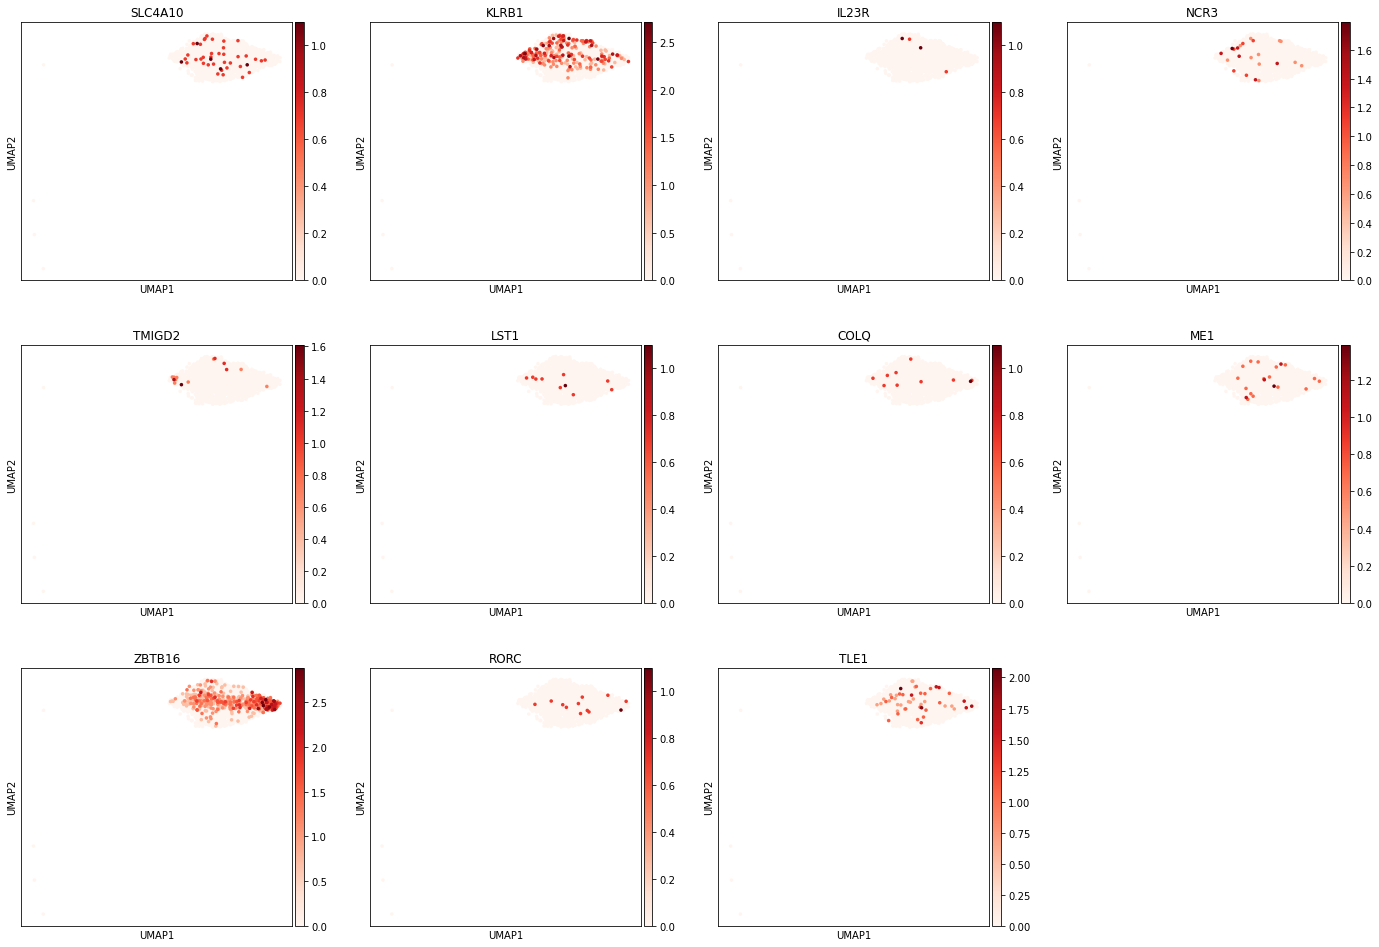

In [ ]:
pl.rcParams['figure.figsize']=(5,5)
sc.pl.umap(adata,color=marker_genes,legend_loc='on data',color_map='Reds')

In [ ]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'GNLY', 'NKG7','IL7R','LYZ', 'CD14','FCGR3A', 'MS4A7', 'FCER1A', 'CST3',
                'PPBP','LGALS3', 'S100A8', 'KLRB1', 'HLA-DRA']

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(4,4) #rescale figures
sc.pl.umap(adata=adata, color=marker_genes,color_map='Reds', use_raw=True)

# Differential expression analysis

In [ ]:
subset=adata[adata.obs['annotated'].isin(['pDC'])]
subset

Trying to set attribute `.uns` of view, copying.


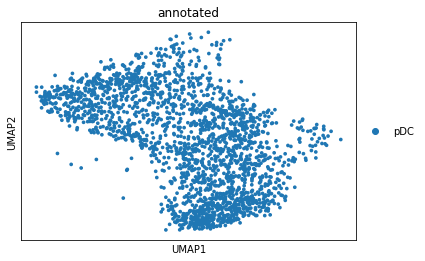

In [ ]:
sc.pl.umap(subset, color='annotated')

In [ ]:
subset.write('pDC_scenic.h5ad')

In [ ]:
adata.obs['clustercondition'] = adata.obs['annotated'].astype(str)+adata.obs['condition'].astype(str)
adata.obs['clustercondition']=adata.obs['clustercondition'].astype('category')

In [ ]:
subset.obs['clustercondition'] = subset.obs['annotated'].astype(str)+subset.obs['condition'].astype(str)
subset.obs['clustercondition']=subset.obs['clustercondition'].astype('category')

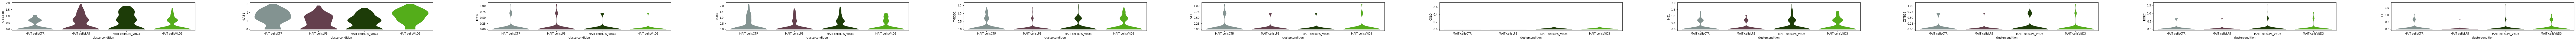

In [ ]:
pl.rcParams['figure.figsize']=(10,2)
pl.rcParams['lines.linewidth'] = 0.1
sc.pl.violin(subset, genes, groupby='clustercondition', stripplot=False)

In [ ]:
genes=['GZMB','TMSB10','GAPDH','ACTG1','IFI27','LTB','MYL6','ITM2C']

In [ ]:
genes=['NEAT1','SRGN','IRF4','DUSP5','CCR7','PARP14','P2RY10']

In [ ]:
genes=['CD14','TMSB4X','CCL19','TMSB10','S100A9','S100A11','CXCL8','CXCL2']

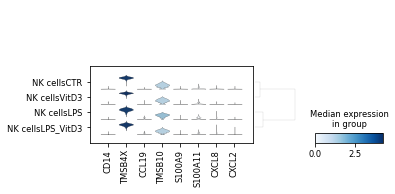

In [ ]:
ax = sc.pl.stacked_violin(subset, genes, groupby='clustercondition', swap_axes=False, dendrogram=True)

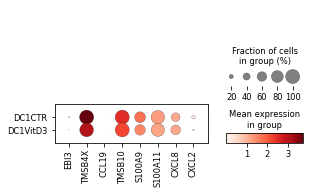

In [ ]:
sc.pl.dotplot(subset,genes, 'clustercondition', dendrogram=True)

In [ ]:
# added `n_genes` to store information in all genes. This is needed if we want to plot log fold changes or pvalues
sc.tl.rank_genes_groups(subset, groupby='clustercondition', n_genes=adata.shape[1], method='wilcoxon',corr_method="bonferroni")

Trying to set attribute `.uns` of view, copying.


In [ ]:
markers=pd.DataFrame(subset.uns['rank_genes_groups']['names']).head(20)
markers

,MAIT cellsLPS,MAIT cellsLPS_VitD3
0,TMSB10,NEAT1
1,HLA-C,MT-ND4
2,PSME2,MT-ND2
3,CORO1A,MT-ND6
4,MYL6,PABPC1
5,SEC61G,PARP14
6,BST2,RNF213
7,EEF1A1,SYNE2
8,OAZ1,UTRN
9,ACTG1,YTHDC1


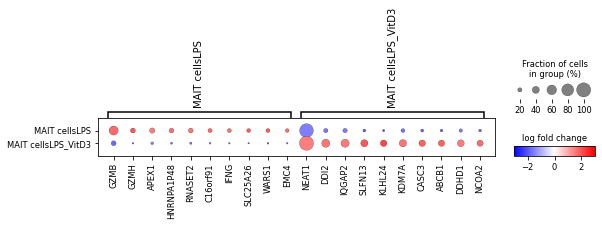

In [ ]:
pl.rcParams['figure.figsize']=(10,5)
sc.pl.rank_genes_groups_dotplot(subset, n_genes=10, values_to_plot='logfoldchanges',min_logfoldchange=1.5, vmax=3, vmin=-3, cmap='bwr')
#sc.pl.rank_genes_groups_dotplot(subset, n_genes=10, values_to_plot='logfoldchanges', min_logfoldchange=2, vmax=3, vmin=-3, cmap='bwr')

# Subset

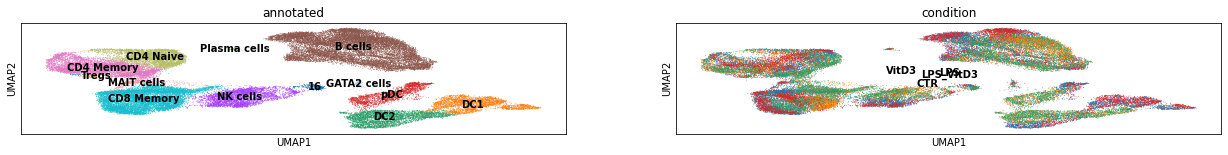

In [ ]:
sc.pl.umap(adata,color=['annotated','condition' ],legend_loc='on data')

In [ ]:
subset=adata[adata.obs['annotated'].isin(['MAIT cells'])]
subset

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 488 × 25419
    obs: 'sample', 'condition', 'donnor', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'donor_condition', 'D1_CTR,D1_LPS,D1_VitD3,D1_LPS_VitD3,D2_CTR,D2_LPS,D2_VitD3,D2_LPS_VitD3,D3_CTR,D3_LPS,D3_VitD3,D3_LPS_VitD3', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r08A', 'annotated', 'umap_density_condition', 'clustercondition'
    var: 'gene_name', 'mito', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dro

In [ ]:
subset=subset[subset.obs['condition'].isin(['CTR','VitD3'])]
subset

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 246 × 25419
    obs: 'sample', 'condition', 'donnor', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'donor_condition', 'D1_CTR,D1_LPS,D1_VitD3,D1_LPS_VitD3,D2_CTR,D2_LPS,D2_VitD3,D2_LPS_VitD3,D3_CTR,D3_LPS,D3_VitD3,D3_LPS_VitD3', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r08A', 'annotated', 'umap_density_condition', 'clustercondition'
    var: 'gene_name', 'mito', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dro

In [ ]:
subset=subset[subset.obs['condition'].isin(['LPS','LPS_VitD3'])]
subset

View of AnnData object with n_obs × n_vars = 242 × 25419
    obs: 'sample', 'condition', 'donnor', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'donor_condition', 'D1_CTR,D1_LPS,D1_VitD3,D1_LPS_VitD3,D2_CTR,D2_LPS,D2_VitD3,D2_LPS_VitD3,D3_CTR,D3_LPS,D3_VitD3,D3_LPS_VitD3', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r08A', 'annotated', 'umap_density_condition', 'clustercondition'
    var: 'gene_name', 'mito', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dro

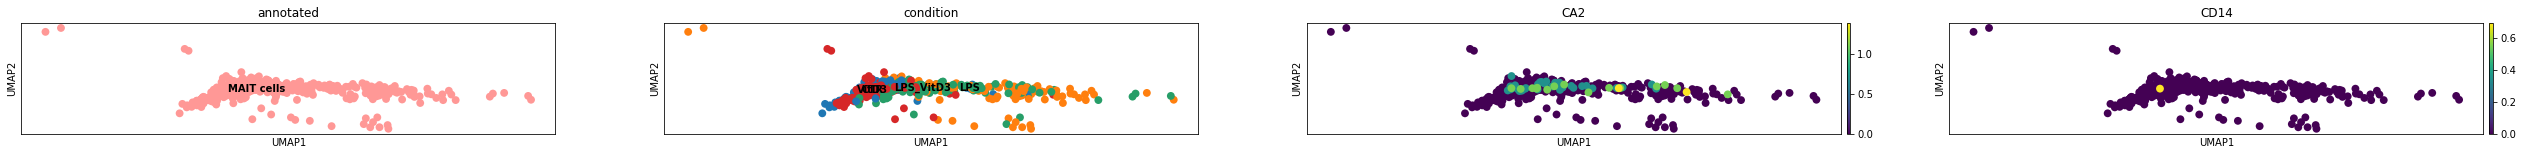

In [ ]:
sc.pl.umap(subset,color=['annotated','condition','CA2','CD14' ],legend_loc='on data')

In [ ]:
sc.tl.rank_genes_groups(subset, groupby='condition', 
                        groups= ['LPS_VitD3'], reference='LPS', rankby_abs=True)

Trying to set attribute `.uns` of view, copying.


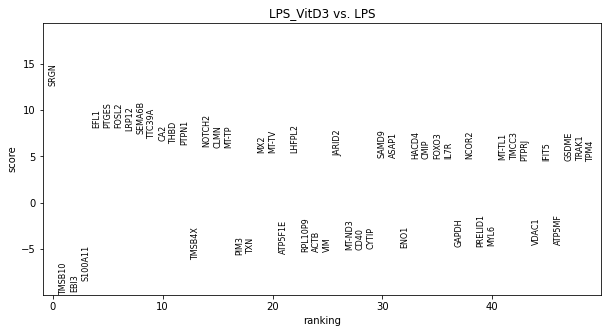

In [ ]:
pl.rcParams['figure.figsize']=(10,5)
sc.pl.rank_genes_groups(subset, size=10, n_genes=50)

In [ ]:
markers=pd.DataFrame(subset.uns['rank_genes_groups']['names']).head(30)
markers

In [ ]:
markers.to_csv('DC2_LPS_vs_CTR.csv')

In [ ]:
pl.rcParams['lines.linewidth'] = 0.1
sc.pl.rank_genes_groups_violin(subset,  n_genes=20, jitter=False)

In [ ]:
subset.write('cDC.h5ad')

# MAST

In [ ]:
#cluster to analyze

cluster0="All"



cluster="cluster"+cluster0
cluster

'clusterAll'

In [ ]:
%%R
suppressPackageStartupMessages(library(scater))
suppressPackageStartupMessages(library(MAST))


In [ ]:
adata=sc.read('Tcells_leiden_cl_vst.h5ad')
adata

AnnData object with n_obs × n_vars = 2368 × 16992
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'sample', 'batch', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Th2', 'Th17', 'NK', 'Th1', 'Skin_barrier', 'SS', 'Migrated'
    var: 'mito', 'ambient_expression-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'ambient_expression-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log

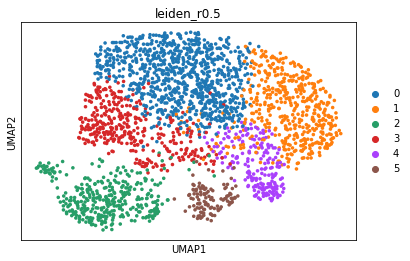

In [ ]:
sc.pl.umap(adata,color='leiden_r0.5')

In [ ]:
sc.pl.umap(adata,color=['CD8A','CD8B','CD4','CD19','PTPRC','NCAM1'],use_raw=True,vmax=5)

In [ ]:
adata.X=adata.layers["sct_corrected"]
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X

In [ ]:
ribo_genes = adata.var_names.str.startswith(("RPS","RPL"))
mito_genes = adata.var_names.str.startswith('MT-')
malat1 = adata.var_names.str.startswith('MALAT1')

In [ ]:
remove = np.add(ribo_genes,mito_genes)
remove = np.add(remove,malat1)

kept_genes = np.invert(remove)
adata = adata[:,kept_genes]

In [ ]:
adata=adata[adata.obs['leiden_r0.5'].isin([cluster0])].copy()
adata

AnnData object with n_obs × n_vars = 345 × 17479
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r0.5A'
    var: 'gene_name', 'mito', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', '

In [ ]:
adata=adata[adata.obs['leiden_r0.5'].isin(['0','1','3','4',])].copy()
adata

AnnData object with n_obs × n_vars = 1901 × 16920
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'sample', 'batch', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Th2', 'Th17', 'NK', 'Th1', 'Skin_barrier', 'SS', 'Migrated'
    var: 'mito', 'ambient_expression-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'ambient_expression-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log

# HR vs CR

In [ ]:
subset=adata[adata.obs['treatmentcondition'].isin(['HR','CR'])].copy()
subset
#Filter genes:
print('Total number of genes: {:d}'.format(subset.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(subset, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(subset.n_vars))

Total number of genes: 16992
Number of genes after cell filter: 12794


In [ ]:
print(subset.obs['treatmentcondition'].value_counts())

HR    511
CR    436
Name: treatmentcondition, dtype: int64


In [ ]:
adata.obs['Donnor']

barcode
AACACACAGTGGTGGT-0    AD13
ACAAGCTTCAATCCAG-0    AD13
CCCTAACCAGAATTCC-0    AD13
CTGGACGTCCTTATGT-0    AD19
GGGAGATTCTACTATC-0    AD13
                      ... 
AAAGGATTCAGGGATG-4    AD16
CGCGTGACAGGTGTTT-4    AD16
CACAACATCAGCTCTC-4    AD16
CTGAGCGTCTAGAGCT-4    AD18
TGTCCCAGTACGTACT-4    AD16
Name: Donnor, Length: 2368, dtype: category
Categories (10, object): ['AD5', 'AD8', 'AD12', 'AD13', ..., 'AD18', 'AD19', 'AD20', 'AD21']

In [ ]:
#HR vs CR
from rpy2 import robjects
def mast_de_bulk(adata, save):
    '''Compute differential expression with the MAST package by treatment covariate on the whole dataset'''
    
    #if groupby not in ['louvain_final', 'louvain_three']:
    #    raise NotImplementedError("This function is only implemented to be used with 'louvain_final' and 'louvain_three' group labels")
    
    # Define R function to run MAST analysis
    robjects.r('''
        mast_de_r <- function(adata, obs, var){
            #Prepare data sets for SingleCellExperiment data structure conversion
            #obs['wellKey'] = row.names(obs)
            #var['primerid'] = row.names(var)
            print('Deploying to R...')
            #Convert to SingleCellExperiment type
            #sca <- FromMatrix(exprsArray=data_mat, fData=var)
            sca <- SceToSingleCellAssay(adata, class = "SingleCellAssay")
            #Compute Gene detection rate
            colData(sca)$n_genes = scale(colData(sca)$n_genes)

            #Create a vector that will hold all the DE results

            count <- 0
            print('Begin computation...')
            #Define & run hurdle model
            zlmCond <- zlm(formula = ~treatmentcondition + n_genes, sca=sca)
            summaryCond <- summary(zlmCond, doLRT='treatmentconditionHR')
            summaryDt <- summaryCond$datatable
            
            result <- merge(summaryDt[contrast=='treatmentconditionHR' & component=='H',.(primerid, `Pr(>Chisq)`)], #p-vals
                             summaryDt[contrast=='treatmentconditionHR' & component=='logFC', .(primerid, coef)], #logFC coefficients
                             by='primerid') 
                             
            #Correct for multiple testing (FDR correction) and filtering
            result[,FDR:=p.adjust(`Pr(>Chisq)`, 'fdr')]
            result[,coef:=result[,coef]/log(2)]
            names(result) <- c("gene", "pval", "log2FC", "qval")
            result = result[order(result$qval),]
            output <- result
                
            return(output)
        }
    ''')
    
    mast_de = robjects.globalenv['mast_de_r']
    

    
    #Create new Anndata object for use in MAST with non-batch corrected data as before
    adata_test = adata.copy()
    #adata_test.X = adata.raw.X
    adata_test.obs['n_genes'] = (adata_test.X > 0).sum(1) 
    
    obs = adata_test.obs
    var = adata_test.var
    
    expr_dict = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_stress = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_ctrl = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr = np.mean(adata_test.X, axis=0).T
    expr_stress = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='HR')].X, axis=0).T
    expr_ctrl = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='CR')].X, axis=0).T
    for i, gene in enumerate(adata_test.var.index):
        expr_dict[gene] = expr[i]
        expr_dict_stress[gene] = expr_stress[i]
        expr_dict_ctrl[gene] = expr_ctrl[i]
    
    result = mast_de(adata_test, obs, var)
    result
    writer = pd.ExcelWriter(save, engine='xlsxwriter')  
    result['meanExpr'] = [expr_dict[gene] for gene in result['gene'].values]
    result['meanExprStress'] = [expr_dict_stress[gene] for gene in result['gene'].values]
    result['meanExprCtrl'] = [expr_dict_ctrl[gene] for gene in result['gene'].values]
    result.to_excel(writer)

    writer.save()

    return result

In [ ]:
savefig=cluster+"_HR_vs_CR.xlsx"
mast_de_bulk(subset,save=savefig)

/opt/conda/lib/python3.7/site-packages/anndata2ri/py2r.py:38: NotConvertedWarning: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'
  warn(str(e), NotConvertedWarning)


[1] "Deploying to R..."


R[write to console]: `fData` has no primerid.  I'll make something up.

R[write to console]: `cData` has no wellKey.  I'll make something up.

R[write to console]: Assuming data assay in position 3, with name logcounts is log-transformed.



[1] "Begin computation..."


R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   0% with 0 failures
R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   2% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   4% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   5% with 0 failures
R[write to console]: 
R[

,gene,pval,log2FC,qval,meanExpr,meanExprStress,meanExprCtrl
1,POLR1D,5.735461e-08,-0.225264,0.000734,[[[[[0.28035671]]]]],[[[[[0.20281843]]]]],[[[[[0.371233]]]]]
2,PAPPA,2.245800e-07,-0.135697,0.001437,[[[[[0.11489305]]]]],[[[[[0.06889743]]]]],[[[[[0.16880076]]]]]
3,HLA-A,7.199589e-07,-0.199150,0.001858,[[[[[0.52390815]]]]],[[[[[0.46735106]]]]],[[[[[0.5901941]]]]]
4,LAMA3,7.218940e-07,-0.198893,0.001858,[[[[[0.26003229]]]]],[[[[[0.19242836]]]]],[[[[[0.33926535]]]]]
5,UTY,7.262426e-07,0.136169,0.001858,[[[[[0.15098385]]]]],[[[[[0.20387504]]]]],[[[[[0.08899439]]]]]
...,...,...,...,...,...,...,...
12790,ZXDC,8.572299e-01,0.006677,1.000000,[[[[[0.03943871]]]]],[[[[[0.04460905]]]]],[[[[[0.03337898]]]]]
12791,ZYG11A,5.841224e-01,0.005550,1.000000,[[[[[0.00882731]]]]],[[[[[0.01181686]]]]],[[[[[0.00532349]]]]]
12792,ZYG11B,9.917606e-01,-0.000620,1.000000,[[[[[0.05086977]]]]],[[[[[0.05520516]]]]],[[[[[0.04578862]]]]]
12793,ZYX,8.513135e-01,0.004329,1.000000,[[[[[0.01271973]]]]],[[[[[0.01465698]]]]],[[[[[0.01044923]]]]]


# HT vs CT

In [ ]:
subset=adata[adata.obs['treatmentcondition'].isin(['HT','CT'])].copy()
subset
#Filter genes:
print('Total number of genes: {:d}'.format(subset.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(subset, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(subset.n_vars))

Total number of genes: 16992
Number of genes after cell filter: 13626


In [ ]:
print(subset.obs['treatmentcondition'].value_counts())

HT    1111
CT     310
Name: treatmentcondition, dtype: int64


In [ ]:
#HT vs CT
from rpy2 import robjects
def mast_de_bulk(adata, save):
    '''Compute differential expression with the MAST package by treatment covariate on the whole dataset'''
    
    #if groupby not in ['louvain_final', 'louvain_three']:
    #    raise NotImplementedError("This function is only implemented to be used with 'louvain_final' and 'louvain_three' group labels")
    
    # Define R function to run MAST analysis
    robjects.r('''
        mast_de_r <- function(adata, obs, var){
            #Prepare data sets for SingleCellExperiment data structure conversion
            #obs['wellKey'] = row.names(obs)
            #var['primerid'] = row.names(var)
            print('Deploying to R...')
            #Convert to SingleCellExperiment type
            #sca <- FromMatrix(exprsArray=data_mat, fData=var)
            sca <- SceToSingleCellAssay(adata, class = "SingleCellAssay")
            #Compute Gene detection rate
            colData(sca)$n_genes = scale(colData(sca)$n_genes)

            #Create a vector that will hold all the DE results

            count <- 0
            print('Begin computation...')
            #Define & run hurdle model
            zlmCond <- zlm(formula = ~treatmentcondition + n_genes, sca=sca)
            summaryCond <- summary(zlmCond, doLRT='treatmentconditionHT')
            summaryDt <- summaryCond$datatable
            
            result <- merge(summaryDt[contrast=='treatmentconditionHT' & component=='H',.(primerid, `Pr(>Chisq)`)], #p-vals
                             summaryDt[contrast=='treatmentconditionHT' & component=='logFC', .(primerid, coef)], #logFC coefficients
                             by='primerid') 
                             
            #Correct for multiple testing (FDR correction) and filtering
            result[,FDR:=p.adjust(`Pr(>Chisq)`, 'fdr')]
            result[,coef:=result[,coef]/log(2)]
            names(result) <- c("gene", "pval", "log2FC", "qval")
            result = result[order(result$qval),]
            output <- result
                
            return(output)
        }
    ''')
    
    mast_de = robjects.globalenv['mast_de_r']
    

    
    #Create new Anndata object for use in MAST with non-batch corrected data as before
    adata_test = adata.copy()
    #adata_test.X = adata.raw.X
    adata_test.obs['n_genes'] = (adata_test.X > 0).sum(1) 
    
    obs = adata_test.obs
    var = adata_test.var
    
    expr_dict = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_stress = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_ctrl = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr = np.mean(adata_test.X, axis=0).T
    expr_stress = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='HT')].X, axis=0).T
    expr_ctrl = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='CT')].X, axis=0).T
    for i, gene in enumerate(adata_test.var.index):
        expr_dict[gene] = expr[i]
        expr_dict_stress[gene] = expr_stress[i]
        expr_dict_ctrl[gene] = expr_ctrl[i]
    
    result = mast_de(adata_test, obs, var)
    result
    writer = pd.ExcelWriter(save, engine='xlsxwriter')  
    result['meanExpr'] = [expr_dict[gene] for gene in result['gene'].values]
    result['meanExprStress'] = [expr_dict_stress[gene] for gene in result['gene'].values]
    result['meanExprCtrl'] = [expr_dict_ctrl[gene] for gene in result['gene'].values]
    result.to_excel(writer)

    writer.save()

    return result

In [ ]:
savefig=cluster+"_HT_vs_CT.xlsx"
mast_de_bulk(subset,save=savefig)

/opt/conda/lib/python3.7/site-packages/anndata2ri/py2r.py:38: NotConvertedWarning: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'
  warn(str(e), NotConvertedWarning)


[1] "Deploying to R..."


R[write to console]: `fData` has no primerid.  I'll make something up.

R[write to console]: `cData` has no wellKey.  I'll make something up.

R[write to console]: Assuming data assay in position 3, with name logcounts is log-transformed.



[1] "Begin computation..."


R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   0% with 0 failures
R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   2% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   4% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   5% with 0 failures
R[write to console]: 
R[

,gene,pval,log2FC,qval,meanExpr,meanExprStress,meanExprCtrl
1,POLR1D,2.994252e-10,0.173265,0.000004,[[[[[0.40104048]]]]],[[[[[0.43207235]]]]],[[[[[0.28982628]]]]]
2,LAMA3,3.107197e-09,0.188622,0.000021,[[[[[0.39554734]]]]],[[[[[0.42858354]]]]],[[[[[0.27714984]]]]]
3,ARHGEF9,2.934541e-08,0.178114,0.000133,[[[[[1.08948568]]]]],[[[[[1.12181937]]]]],[[[[[0.97360592]]]]]
4,FKBP5,1.039610e-07,-0.208120,0.000354,[[[[[0.69895733]]]]],[[[[[0.66359131]]]]],[[[[[0.82570458]]]]]
5,PANK3,2.430088e-07,0.070111,0.000662,[[[[[0.41044756]]]]],[[[[[0.4252263]]]]],[[[[[0.35748246]]]]]
...,...,...,...,...,...,...,...
13622,ZXDC,7.599133e-01,0.007020,1.000000,[[[[[0.03078838]]]]],[[[[[0.03074186]]]]],[[[[[0.03095508]]]]]
13623,ZYG11A,5.749775e-01,0.005554,1.000000,[[[[[0.00817005]]]]],[[[[[0.00902778]]]]],[[[[[0.00509602]]]]]
13624,ZYG11B,8.373194e-01,0.006871,1.000000,[[[[[0.04837138]]]]],[[[[[0.04784898]]]]],[[[[[0.05024358]]]]]
13625,ZYX,3.657545e-01,0.009389,1.000000,[[[[[0.01330859]]]]],[[[[[0.01465216]]]]],[[[[[0.00849337]]]]]


# CT vs CR

In [ ]:
subset=adata[adata.obs['treatmentcondition'].isin(['CT','CR'])].copy()
subset
#Filter genes:
print('Total number of genes: {:d}'.format(subset.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(subset, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(subset.n_vars))

Total number of genes: 16992
Number of genes after cell filter: 11527


In [ ]:
print(subset.obs['treatmentcondition'].value_counts())

CR    436
CT    310
Name: treatmentcondition, dtype: int64


In [ ]:
#CR vs CT
from rpy2 import robjects
def mast_de_bulk(adata, save):
    '''Compute differential expression with the MAST package by treatment covariate on the whole dataset'''
    
    #if groupby not in ['louvain_final', 'louvain_three']:
    #    raise NotImplementedError("This function is only implemented to be used with 'louvain_final' and 'louvain_three' group labels")
    
    # Define R function to run MAST analysis
    robjects.r('''
        mast_de_r <- function(adata, obs, var){
            #Prepare data sets for SingleCellExperiment data structure conversion
            #obs['wellKey'] = row.names(obs)
            #var['primerid'] = row.names(var)
            print('Deploying to R...')
            #Convert to SingleCellExperiment type
            #sca <- FromMatrix(exprsArray=data_mat, fData=var)
            sca <- SceToSingleCellAssay(adata, class = "SingleCellAssay")
            #Compute Gene detection rate
            colData(sca)$n_genes = scale(colData(sca)$n_genes)

            #Create a vector that will hold all the DE results

            count <- 0
            print('Begin computation...')
            #Define & run hurdle model
            zlmCond <- zlm(formula = ~treatmentcondition + n_genes, sca=sca)
            summaryCond <- summary(zlmCond, doLRT='treatmentconditionCT')
            summaryDt <- summaryCond$datatable
            
            result <- merge(summaryDt[contrast=='treatmentconditionCT' & component=='H',.(primerid, `Pr(>Chisq)`)], #p-vals
                             summaryDt[contrast=='treatmentconditionCT' & component=='logFC', .(primerid, coef)], #logFC coefficients
                             by='primerid') 
                             
            #Correct for multiple testing (FDR correction) and filtering
            result[,FDR:=p.adjust(`Pr(>Chisq)`, 'fdr')]
            result[,coef:=result[,coef]/log(2)]
            names(result) <- c("gene", "pval", "log2FC", "qval")
            result = result[order(result$qval),]
            output <- result
                
            return(output)
        }
    ''')
    
    mast_de = robjects.globalenv['mast_de_r']
    

    
    #Create new Anndata object for use in MAST with non-batch corrected data as before
    adata_test = adata.copy()
    #adata_test.X = adata.raw.X
    adata_test.obs['n_genes'] = (adata_test.X > 0).sum(1) 
    
    obs = adata_test.obs
    var = adata_test.var
    
    expr_dict = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_stress = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_ctrl = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr = np.mean(adata_test.X, axis=0).T
    expr_stress = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='CT')].X, axis=0).T
    expr_ctrl = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='CR')].X, axis=0).T
    for i, gene in enumerate(adata_test.var.index):
        expr_dict[gene] = expr[i]
        expr_dict_stress[gene] = expr_stress[i]
        expr_dict_ctrl[gene] = expr_ctrl[i]
    
    result = mast_de(adata_test, obs, var)
    result
    writer = pd.ExcelWriter(save, engine='xlsxwriter')  
    result['meanExpr'] = [expr_dict[gene] for gene in result['gene'].values]
    result['meanExprStress'] = [expr_dict_stress[gene] for gene in result['gene'].values]
    result['meanExprCtrl'] = [expr_dict_ctrl[gene] for gene in result['gene'].values]
    result.to_excel(writer)

    writer.save()

    return result

In [ ]:
savefig=cluster+"_CT_vs_CR.xlsx"
mast_de_bulk(subset,save=savefig)

/opt/conda/lib/python3.7/site-packages/anndata2ri/py2r.py:38: NotConvertedWarning: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'
  warn(str(e), NotConvertedWarning)


[1] "Deploying to R..."


R[write to console]: `fData` has no primerid.  I'll make something up.

R[write to console]: `cData` has no wellKey.  I'll make something up.

R[write to console]: Assuming data assay in position 3, with name logcounts is log-transformed.



[1] "Begin computation..."


R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   0% with 0 failures
R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   2% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   4% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   5% with 0 failures
R[write to console]: 
R[

,gene,pval,log2FC,qval,meanExpr,meanExprStress,meanExprCtrl
1,KIF5C,0.000033,-0.090574,0.348822,[[[[[0.07561284]]]]],[[[[[0.03946376]]]]],[[[[[0.10131517]]]]]
2,MT1H,0.000061,0.050039,0.348822,[[[[[0.01798527]]]]],[[[[[0.04047506]]]]],[[[[[0.00199482]]]]]
3,ADAMTS12,0.000505,0.005311,0.801177,[[[[[0.00545682]]]]],[[[[[0.00918591]]]]],[[[[[0.0028054]]]]]
4,AL009177.1,0.002689,-0.000383,0.801177,[[[[[0.01266362]]]]],[[[[[0.01279511]]]]],[[[[[0.01257013]]]]]
5,AP002381.2,0.001499,NaN,0.801177,[[[[[0.00635295]]]]],[[[[[0.]]]]],[[[[[0.01086996]]]]]
...,...,...,...,...,...,...,...
11523,ZYG11A,0.827776,-0.000793,1.000000,[[[[[0.00522897]]]]],[[[[[0.00509602]]]]],[[[[[0.00532349]]]]]
11524,ZYG11B,0.941154,0.001479,1.000000,[[[[[0.04763988]]]]],[[[[[0.05024358]]]]],[[[[[0.04578862]]]]]
11525,ZYX,0.839396,-0.002956,1.000000,[[[[[0.00963647]]]]],[[[[[0.00849337]]]]],[[[[[0.01044923]]]]]
11526,ZZEF1,0.079536,0.031442,1.000000,[[[[[0.09209568]]]]],[[[[[0.10895689]]]]],[[[[[0.0801072]]]]]


# HT vs HR

In [ ]:
subset=adata[adata.obs['treatmentcondition'].isin(['HT','HR'])].copy()
subset
#Filter genes:
print('Total number of genes: {:d}'.format(subset.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(subset, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(subset.n_vars))

Total number of genes: 16992
Number of genes after cell filter: 14400


In [ ]:
print(subset.obs['treatmentcondition'].value_counts())

HT    1111
HR     511
Name: treatmentcondition, dtype: int64


In [ ]:
#HT vs HR
from rpy2 import robjects
def mast_de_bulk(adata, save):
    '''Compute differential expression with the MAST package by treatment covariate on the whole dataset'''
    
    #if groupby not in ['louvain_final', 'louvain_three']:
    #    raise NotImplementedError("This function is only implemented to be used with 'louvain_final' and 'louvain_three' group labels")
    
    # Define R function to run MAST analysis
    robjects.r('''
        mast_de_r <- function(adata, obs, var){
            #Prepare data sets for SingleCellExperiment data structure conversion
            #obs['wellKey'] = row.names(obs)
            #var['primerid'] = row.names(var)
            print('Deploying to R...')
            #Convert to SingleCellExperiment type
            #sca <- FromMatrix(exprsArray=data_mat, fData=var)
            sca <- SceToSingleCellAssay(adata, class = "SingleCellAssay")
            #Compute Gene detection rate
            colData(sca)$n_genes = scale(colData(sca)$n_genes)

            #Create a vector that will hold all the DE results

            count <- 0
            print('Begin computation...')
            #Define & run hurdle model
            zlmCond <- zlm(formula = ~treatmentcondition + n_genes, sca=sca)
            summaryCond <- summary(zlmCond, doLRT='treatmentconditionHT')
            summaryDt <- summaryCond$datatable
            
            result <- merge(summaryDt[contrast=='treatmentconditionHT' & component=='H',.(primerid, `Pr(>Chisq)`)], #p-vals
                             summaryDt[contrast=='treatmentconditionHT' & component=='logFC', .(primerid, coef)], #logFC coefficients
                             by='primerid') 
                             
            #Correct for multiple testing (FDR correction) and filtering
            result[,FDR:=p.adjust(`Pr(>Chisq)`, 'fdr')]
            result[,coef:=result[,coef]/log(2)]
            names(result) <- c("gene", "pval", "log2FC", "qval")
            result = result[order(result$qval),]
            output <- result
                
            return(output)
        }
    ''')
    
    mast_de = robjects.globalenv['mast_de_r']
    

    
    #Create new Anndata object for use in MAST with non-batch corrected data as before
    adata_test = adata.copy()
    #adata_test.X = adata.raw.X
    adata_test.obs['n_genes'] = (adata_test.X > 0).sum(1) 
    
    obs = adata_test.obs
    var = adata_test.var
    
    expr_dict = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_stress = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr_dict_ctrl = {adata_test.var.index[i]:{} for i in range(adata_test.shape[1])}
    expr = np.mean(adata_test.X, axis=0).T
    expr_stress = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='HT')].X, axis=0).T
    expr_ctrl = np.mean(adata_test[(adata_test.obs['treatmentcondition']=='HR')].X, axis=0).T
    for i, gene in enumerate(adata_test.var.index):
        expr_dict[gene] = expr[i]
        expr_dict_stress[gene] = expr_stress[i]
        expr_dict_ctrl[gene] = expr_ctrl[i]
    
    result = mast_de(adata_test, obs, var)
    result
    writer = pd.ExcelWriter(save, engine='xlsxwriter')  
    result['meanExpr'] = [expr_dict[gene] for gene in result['gene'].values]
    result['meanExprStress'] = [expr_dict_stress[gene] for gene in result['gene'].values]
    result['meanExprCtrl'] = [expr_dict_ctrl[gene] for gene in result['gene'].values]
    result.to_excel(writer)

    writer.save()

    return result

In [ ]:
savefig=cluster+"_HT_vs_HR.xlsx"
mast_de_bulk(subset,save=savefig)


/opt/conda/lib/python3.7/site-packages/anndata2ri/py2r.py:38: NotConvertedWarning: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'
  warn(str(e), NotConvertedWarning)


[1] "Deploying to R..."


R[write to console]: `fData` has no primerid.  I'll make something up.

R[write to console]: `cData` has no wellKey.  I'll make something up.

R[write to console]: Assuming data assay in position 3, with name logcounts is log-transformed.



[1] "Begin computation..."


R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   0% with 0 failures
R[write to console]: 
R[write to console]:  Completed [--------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   1% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   2% with 0 failures
R[write to console]: 
R[write to console]:  Completed [>-------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   3% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   4% with 0 failures
R[write to console]: 
R[write to console]:  Completed [=>------------------------------------------]   5% with 0 failures
R[write to console]: 
R[

,gene,pval,log2FC,qval,meanExpr,meanExprStress,meanExprCtrl
1,POLR1D,4.645937e-25,0.289927,6.690149e-21,[[[[[0.35984747]]]]],[[[[[0.43207235]]]]],[[[[[0.20281843]]]]]
2,LAMA3,1.738853e-24,0.303427,1.251974e-20,[[[[[0.35418447]]]]],[[[[[0.42858354]]]]],[[[[[0.19242836]]]]]
3,ARHGEF9,1.070724e-20,0.431241,5.139476e-17,[[[[[1.01176633]]]]],[[[[[1.12181937]]]]],[[[[[0.77249249]]]]]
4,PANK3,9.953345e-16,0.205416,3.583204e-12,[[[[[0.3721937]]]]],[[[[[0.4252263]]]]],[[[[[0.2568919]]]]]
5,PDS5B,4.703432e-14,0.246819,1.354588e-10,[[[[[0.4142747]]]]],[[[[[0.47540573]]]]],[[[[[0.28136556]]]]]
...,...,...,...,...,...,...,...
14396,ZXDC,4.812497e-01,-0.005578,1.000000e+00,[[[[[0.03511063]]]]],[[[[[0.03074186]]]]],[[[[[0.04460905]]]]]
14397,ZYG11A,9.985734e-01,-0.000177,1.000000e+00,[[[[[0.00990646]]]]],[[[[[0.00902778]]]]],[[[[[0.01181686]]]]]
14398,ZYG11B,6.044449e-01,0.007668,1.000000e+00,[[[[[0.0501665]]]]],[[[[[0.04784898]]]]],[[[[[0.05520516]]]]]
14399,ZYX,9.255833e-01,0.002244,1.000000e+00,[[[[[0.01465368]]]]],[[[[[0.01465216]]]]],[[[[[0.01465698]]]]]


# cell composition

In [ ]:
# add extra code to the path
import sys
sys.path.append('/home/jupyter/bucket/sctoolkit/sctoolkit')
from sctransform import sctransform
from proportions import *
import cellrank as cr
import numpy as np

from matplotlib import colors
pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


cr.logging.print_versions()

cellrank==1.3.1 scanpy==1.7.2 anndata==0.7.6 numpy==1.18.5 numba==0.52.0 scipy==1.6.2 pandas==1.2.4 pygpcca==1.0.2 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 scvelo==0.2.3 pygam==0.8.0 matplotlib==3.4.1 seaborn==0.11.1


In [ ]:
get_proportions_per_channel(adata,'treatmentcondition','leiden_r0.3', covariates=None)

,0,1,2,3,4,5
treatmentcondition,,,,,,
CR,0.375000,0.273707,0.116379,0.133621,0.056034,0.045259
CT,0.597744,0.116541,0.078947,0.109023,0.056391,0.041353
HR,0.400538,0.280914,0.092742,0.145161,0.047043,0.033602
HT,0.449389,0.171902,0.200698,0.109948,0.027051,0.041012


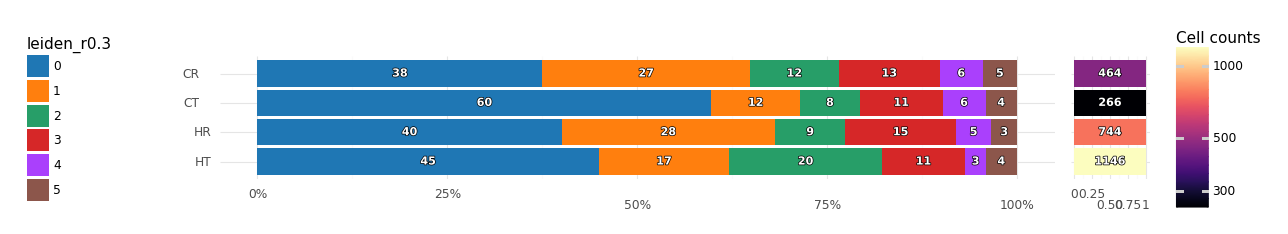

In [ ]:
 fig=plot_proportion_barplot_with_ncells(
    adata,
    'treatmentcondition',
    fill='leiden_r0.3', 
    fill_breakdown=None,
    yaxis_label=None,
    fill_label=None,
    percent_limit=2., 
    show_percent=True,
    height_scale=1., 
    width_scale=1.,
    legend_position=(-0, 0.5),
    normalize_by=None,)
 fig.savefig('cell_composition.pdf', dpi=300, bbox_inches='tight')

# Pseudobulk

In [ ]:
adata

AnnData object with n_obs × n_vars = 2620 × 17479
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2'
    var: 'gene_name', 'mito', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2'

In [ ]:
adata.obs['clusterdonor'] = adata.obs['annotated'].astype(str)+adata.obs['donor_condition'].astype(str)
adata.obs['clusterdonor']=adata.obs['clusterdonor'].astype('category')

In [ ]:
adata.X=adata.layers["sct_corrected"]

In [ ]:
adata.obs['clusterdonor']=adata.obs['sample']

In [ ]:
adata.obs['clusterdonor']

barcode
AAACGAAGTGCACAAG-0    AD19_H_R_HR
AAACGAAGTGTGCTTA-0    AD19_H_R_HR
AAAGAACCACCTGCAG-0    AD13_H_T_HT
AAAGGATAGCAGCAGT-0    AD13_H_T_HT
AAAGGGCCAGACACCC-0    AD19_H_R_HR
                         ...     
TTGGGATAGAAATGGG-4    AD16_H_R_HR
TTGGGATCATCCTTCG-4    AD16_C_R_CR
TTGTTTGTCCAAACCA-4    AD16_C_R_CR
TTTCGATCAAGCGATG-4    AD16_C_R_CR
TTTCGATGTAAGGTCG-4    AD16_H_R_HR
Name: clusterdonor, Length: 2620, dtype: category
Categories (20, object): ['AD5_C_T_CT', 'AD5_H_T_HT', 'AD8_C_T_CT', 'AD8_H_T_HT', ..., 'AD20_C_R_CR', 'AD20_H_R_HR', 'AD21_C_R_CR', 'AD21_H_R_HR']

In [ ]:
res = pd.DataFrame(columns=adata.var_names, index=adata.obs['clusterdonor'].cat.categories)                                                                                                 

for clust in adata.obs.clusterdonor.cat.categories: 
    res.loc[clust] = adata[adata.obs['clusterdonor'].isin([clust]),:].X.mean(0)

In [ ]:
res=res.T

In [ ]:
res

,AD5_C_T_CT,AD5_H_T_HT,AD8_C_T_CT,AD8_H_T_HT,AD12_C_R_CR,AD12_H_R_HR,AD13_C_T_CT,AD13_H_T_HT,AD14_C_T_CT,AD14_H_T_HT,AD16_C_R_CR,AD16_H_R_HR,AD18_C_T_CT,AD18_H_T_HT,AD19_C_R_CR,AD19_H_R_HR,AD20_C_R_CR,AD20_H_R_HR,AD21_C_R_CR,AD21_H_R_HR
gene_id,,,,,,,,,,,,,,,,,,,,
STPG1,0.0,0.0,0.0,0.002129,0.0,0.0,0.0,0.0,0.0,0.006027,0.0,0.011002,0.0,0.028881,0.008664,0.004916,0.0,0.01083,0.0,0.003067
NIPAL3,0.0,0.054722,0.016906,0.035237,0.071705,0.090087,0.063013,0.057672,0.055547,0.025626,0.046736,0.044009,0.0,0.132419,0.077979,0.064743,0.017115,0.043322,0.025597,0.061862
SPRTN,0.033007,0.054722,0.050718,0.018624,0.071705,0.023803,0.0,0.09452,0.02666,0.030137,0.032568,0.033007,0.0,0.0,0.034657,0.009832,0.047793,0.027996,0.039608,0.041665
FAM76A,0.0,0.091204,0.077514,0.045687,0.023902,0.067013,0.0,0.02363,0.044769,0.044355,0.033978,0.0,0.063013,0.028881,0.025993,0.0,0.030678,0.043322,0.039608,0.032985
VPS13D,0.241675,0.229559,0.133674,0.113085,0.252998,0.171434,0.063013,0.055137,0.194887,0.139962,0.089181,0.131004,0.063013,0.074657,0.131437,0.052035,0.126263,0.101155,0.150214,0.11551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC134878.2,0.0,0.018241,0.0,0.004882,0.047803,0.03212,0.0,0.0,0.011426,0.006027,0.006796,0.0,0.0,0.028881,0.0,0.0,0.008557,0.017166,0.0,0.0
AC011751.1,0.033007,0.0,0.016906,0.003194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009832,0.0,0.0,0.0,0.0
AC010889.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002009,0.0,0.0,0.0,0.0,0.008664,0.0,0.0,0.01083,0.0,0.0


In [ ]:
res.to_csv("Tcells_Average_genexpression_sample.csv")

# Genprofiler

In [ ]:
pip install gprofiler-official

Note: you may need to restart the kernel to use updated packages.


In [ ]:
adata=adata[adata.obs['leiden_r0.3'].isin(["2"])].copy()
adata

AnnData object with n_obs × n_vars = 374 × 17479
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'doublet_score', 'predicted_doublet', 'sample', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2'
    var: 'gene_name', 'mito', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2',

In [ ]:
sc.tl.rank_genes_groups(adata, "treatmentcondition")


In [ ]:
sc.queries.enrich(adata, "CR")

AssertionError: ignored

In [ ]:
sc.queries.enrich(adata, "CT")

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0005737,cytoplasm,0.000120,True,"""All of the contents of a cell excluding the p...",11911,661,475,18960,0.718608,0.039879,query_1,"[GO:0005622, GO:0110165]"
1,TF,TF:M12354,Factor: ZNF37A; motif: CCYYGGCTCCNTSCCMN,0.000431,True,Factor: ZNF37A; motif: CCYYGGCTCCNTSCCMN,10961,691,450,19722,0.651230,0.041055,query_1,[TF:M00000]
2,REAC,REAC:R-HSA-5661231,Metallothioneins bind metals,0.000546,True,Metallothioneins bind metals,11,403,6,10543,0.014888,0.545455,query_1,[REAC:R-HSA-5660526]
3,WP,WP:WP3617,Photodynamic therapy-induced NF-kB survival si...,0.000740,True,Photodynamic therapy-induced NF-kB survival si...,35,289,9,7581,0.031142,0.257143,query_1,[WP:000000]
4,GO:CC,GO:0089717,spanning component of membrane,0.000994,True,"""The component of a membrane consisting of gen...",20,661,7,18960,0.010590,0.350000,query_1,[GO:0016021]
5,GO:BP,GO:0097501,stress response to metal ion,0.001200,True,"""Any process that results in a change in state...",16,623,7,18117,0.011236,0.437500,query_1,"[GO:0006950, GO:0010038]"
6,KEGG,KEGG:03060,Protein export,0.001604,True,Protein export,23,302,7,8001,0.023179,0.304348,query_1,[KEGG:00000]
7,TF,TF:M00933,Factor: Sp1; motif: CCCCGCCCCN,0.001617,True,Factor: Sp1; motif: CCCCGCCCCN,9715,691,404,19722,0.584660,0.041585,query_1,[TF:M00000]
8,REAC,REAC:R-HSA-5660526,Response to metal ions,0.003219,True,Response to metal ions,14,403,6,10543,0.014888,0.428571,query_1,[REAC:R-HSA-8953897]
9,WP,WP:WP3286,Copper homeostasis,0.005009,True,Copper homeostasis,54,289,10,7581,0.034602,0.185185,query_1,[WP:000000]


In [ ]:
sc.queries.enrich(adata, "HR")

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0005829,cytosol,8.914967e-11,True,"""The part of the cytoplasm that does not conta...",5303,176,95,18960,0.539773,0.017914,query_1,"[GO:0005737, GO:0110165]"
1,GO:BP,GO:0030155,regulation of cell adhesion,1.852116e-09,True,"""Any process that modulates the frequency, rat...",748,174,32,18117,0.183908,0.042781,query_1,"[GO:0007155, GO:0050794]"
2,TF,TF:M00695_1,Factor: ETF; motif: GVGGMGG; match class: 1,4.017343e-09,True,Factor: ETF; motif: GVGGMGG; match class: 1,7032,185,113,19722,0.610811,0.016069,query_1,[TF:M00695]
3,GO:BP,GO:0046649,lymphocyte activation,4.153955e-09,True,"""A change in morphology and behavior of a lymp...",771,174,32,18117,0.183908,0.041505,query_1,[GO:0045321]
4,GO:BP,GO:0042110,T cell activation,1.725979e-08,True,"""The change in morphology and behavior of a ma...",489,174,25,18117,0.143678,0.051125,query_1,[GO:0046649]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,GO:BP,GO:0008285,negative regulation of cell population prolife...,4.754543e-02,True,"""Any process that stops, prevents or reduces t...",790,174,21,18117,0.120690,0.026582,query_1,"[GO:0008283, GO:0042127, GO:0048523]"
303,TF,TF:M00915_1,Factor: AP-2; motif: SNNNCCNCAGGCN; match clas...,4.880217e-02,True,Factor: AP-2; motif: SNNNCCNCAGGCN; match clas...,4551,185,68,19722,0.367568,0.014942,query_1,[TF:M00915]
304,GO:MF,GO:0019901,protein kinase binding,4.959801e-02,True,"""Interacting selectively and non-covalently wi...",673,180,18,18676,0.100000,0.026746,query_1,[GO:0019900]
305,GO:MF,GO:0023030,"MHC class Ib protein binding, via antigen bind...",4.966702e-02,True,"""Interacting selectively and non-covalently wi...",2,180,2,18676,0.011111,1.000000,query_1,"[GO:0023025, GO:0023029]"


In [ ]:
sc.queries.enrich(adata, "HT")

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0035556,intracellular signal transduction,3.205276e-17,True,"""The process in which a signal is passed on to...",2772,374,129,18117,0.344920,0.046537,query_1,[GO:0007165]
1,GO:BP,GO:0001775,cell activation,1.818364e-16,True,"""A change in the morphology or behavior of a c...",1495,374,88,18117,0.235294,0.058863,query_1,[GO:0009987]
2,GO:BP,GO:1902531,regulation of intracellular signal transduction,1.062083e-14,True,"""Any process that modulates the frequency, rat...",1842,374,96,18117,0.256684,0.052117,query_1,"[GO:0009966, GO:0035556]"
3,GO:CC,GO:0005829,cytosol,1.402305e-14,True,"""The part of the cytoplasm that does not conta...",5303,384,184,18960,0.479167,0.034697,query_1,"[GO:0005737, GO:0110165]"
4,GO:BP,GO:0009966,regulation of signal transduction,1.726696e-14,True,"""Any process that modulates the frequency, rat...",3165,374,134,18117,0.358289,0.042338,query_1,"[GO:0007165, GO:0010646, GO:0023051, GO:0048583]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,GO:CC,GO:0043228,non-membrane-bounded organelle,4.900572e-02,True,"""Organized structure of distinctive morphology...",5346,384,141,18960,0.367188,0.026375,query_1,[GO:0043226]
615,TF,TF:M11530,Factor: E2F-2; motif: NWTTTGGCGCCAWWNN,4.902916e-02,True,Factor: E2F-2; motif: NWTTTGGCGCCAWWNN,14593,401,332,19722,0.827930,0.022751,query_1,[TF:M00000]
616,MIRNA,MIRNA:hsa-miR-3609,hsa-miR-3609,4.904012e-02,True,hsa-miR-3609,319,374,21,14834,0.056150,0.065831,query_1,[MIRNA:000000]
617,MIRNA,MIRNA:hsa-miR-424-5p,hsa-miR-424-5p,4.917737e-02,True,hsa-miR-424-5p,470,374,27,14834,0.072193,0.057447,query_1,[MIRNA:000000]


In [ ]:
sc.tl.rank_genes_groups(adata, "treatmentcondition")

In [ ]:
markers=pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(50)
markers

,CR,CT,HR,HT
0,RIC1,ARHGEF9,CD63,LAMA3
1,ZCCHC7,SARAF,RBM33,GNG11
2,TNFAIP8,RAB7A,EEF1A1,GALNT17
3,AP004247.2,AP004247.2,NPM1,ZFP36L1
4,CAPZA1,IL1R1,ERN1,EFCAB13
5,TMEM41B,MBD2,GAS5,GPR161
6,SNU13,GNB1,SND1,ANKRD12
7,SETD2,CDH11,SRP14,CBR4
8,LYPD6B,CD44,NDUFB10,DIXDC1
9,PAG1,SYNE2,TCEAL4,ATP6V1D


In [ ]:
def plot_enrichment(
    genes,
    num_pathways=20,
    title='',
    ordered=True,
    cutoff=0.05,
    sources=('GO:BP', 'HPA', 'REAC'),
    organism='hsapiens',
    return_df=False,
):
    en_df = sc.queries.enrich(genes, org=organism, gprofiler_kwargs=dict(no_evidences=False, ordered=ordered, all_results=True, user_threshold=cutoff, sources=sources))
    en_df['name'] = en_df['name'].str.capitalize()
    en_df['intersections'] = ['(' + ','.join(x[:3]) + ')' for x in en_df.intersections]
    en_df['name'] = en_df['name'].astype(str) + ' ' + en_df['intersections'].astype(str)
    en_df = en_df.drop_duplicates('name')[:num_pathways]
    en_df['neglog10_pval'] = -np.log10(en_df['p_value'])
    en_df['name'] = pd.Categorical(en_df['name'], categories=en_df['name'], ordered=True)

    figsize = (7,len(en_df)/4)
    text_start = (en_df.neglog10_pval.max()*0.01)

    g = (
        ggplot(en_df, aes(x='name', y='neglog10_pval')) +
        geom_bar(aes(fill='significant'), stat='identity', color='#0f0f0f', size=0.1) +
        geom_hline(yintercept=-np.log10(cutoff), size=0.05, color='black') +
        geom_text(aes(x='name', y=text_start, label='name'), size=8, ha='left') +coord_flip() +
        scale_x_discrete(limits=list(reversed(en_df.name.cat.categories))) +
        scale_fill_manual({True:'#D3D3D3', False:'#efefef'}) +
        theme_classic() +
        theme(
            figure_size=figsize, panel_spacing_x=1.,
            axis_text_y = element_blank(),
            legend_position = 'none',
        ) +
        labs(y='Gene Set Enrichment (-log10(adj. P value))', x='Pathways', title=title)
    )

    if not return_df:
        return g
    else:
        return g, en_df


In [ ]:
from plotnine import *

In [ ]:
markers1=markers.to_dict('list')
markers1

In [ ]:
markers1['CR']

In [ ]:
#CR
genes=['CYTIP','RNF145','SAMSN1','AL031123.1','NFKB1','SIK3','GNA13','SH3KBP1','ARHGAP26','CENPC','POLR1D','PAPPA','REL','HSP90AA1','HSPA8','STAM','ITGB1','DUSP4','PDE4D','OGA','CLEC2D','AKT3','CD44','SLF1','HSPA1A','DUSP2','UBR5','WWOX','VIM','RAB8B','PRDM2','GPBP1','SDCBP','MAPK6','FBXW7','PTPRJ','RLF','RAD23B','USP3','SBF2','CRADD','RGCC','CTH','STAT5B','DNAJC1','LGALS3','PDS5B','TAB2','GLUD1']

In [ ]:
#CT
genes=['MT2A','ARHGEF9','IL7R','MT1G','RPL10P9','MT1E','LINC00486','MT1F','MT1H','PANK3','TXNIP','HPGD','MT1X','BOD1L1','IQGAP2','NAP1L4','JAML','PLIN2','ZCCHC7','DDX5','NDUFA6','COX6B1','DDX46','SRP9','MT1L','TBXAS1','CCDC66','CCND3','SEC61B','SNHG31','EMB','TLN1','PIK3IP1','ATXN1','ITGAE','KDM5A','COPE','ITFG1','GYPC','S100A6','COX7A2','KRCC1','DGUOK','SEC61G','COX7C','PARP2','SSNA1','FBXL17','PDIA3']

In [ ]:
#HR
genes=['UTY','SEMA4D','DDX3Y','MAP2K1','CNOT6L','PARP8','USP9Y','RHOH','FKBP5','PRKCH','FYN','PRKY','P2RY8','CFLAR','ITPKB','FOXN2','TENT4B','SMCHD1','SMAP2','FNBP1','AKAP13','CDC42SE2','SNX9','ABCC1','PITPNC1','HBS1L','TGFBR2','ELOVL5','AC008014.1','GNA13','GPRIN3','MGAT4A','MIR4300HG','PRKCB','PPP2R5C','LINC01619','SARAF','SORL1','GRB2','TGFB1','GPCPD1','TSPAN14','SLAMF1','PTPRJ','RASA3','FP236383.3','PELI1','ANKRD44','BACH2']

In [ ]:
#HT
genes=['HMOX1','LAMA3','ARHGEF9','PTMA','DCN','PDS5B','CLIC2','SLIT2','SPARCL1','CXCL8','ZFP36L1','POLR1D','ACTB','MAGI2','FTL','CCDC80','GNG11','CXCL2','LINC01362','AL078604.4','IFI27L2','MSC-AS1','ADAMTS2','CTSK','GSN','PTGS2','VEGFA','IGHGP','IGFBP3','SGIP1','RASAL2','DST','AL669831.3','EMP1','NCL','TM4SF1','SYK','MCTP1','BASP1','PTMS','AC119673.2','AC074183.2','ARHGAP24','UACA','LINC02432','SNX16','MT1E','GPR161','NRP1']

In [ ]:
#CR
genes='RIC1','ZCCHC7','TNFAIP8','AP004247.2','CAPZA1','TMEM41B','SNU13','SETD2','LYPD6B','PAG1','OSER1','MOSMO','ZFAND3','RAP1B','FMNL2','TOR1AIP1','ILRUN','EIF1','CYTIP','TNPO3','FAM126B','PCM1','MAPK6','VIM','TMCC1','ARPC5L','WWOX','PDK1','RNF146','RAC1','CYTH1','CLIP1','PPP4R3A','MED13L','WDR36','IRAK2','GPR155','NDRG1','FBXO11','RYK','NCOR1','GATAD2B','ARL8B','PPP1R15A','FAM13A','KAT6B','RRAS2','IARS1','PPIB','PNPLA8'

In [ ]:
#CT
genes=['ARHGEF9','SARAF','RAB7A','AP004247.2','IL1R1','MBD2','GNB1','CDH11','CD44','SYNE2','RAB11FIP3','SERINC5','RIC8B','ANAPC4','ANKRD11','TRAF3IP2-AS1','SIK2','TRA2B','XPO6','CELF2','RELL1','CUL3','CBLB','STAT3','TXNIP','GUK1','HBS1L','MT1E','WDR47','PARD3','SMARCC1','MT2A','KLF9','RNF4','MORC3','NAA50','CEBPD','RYBP','ABL2','FGFR1','NOP53','PDS5A','LPP','ZNF708','TMOD3','TOR1AIP2','RASA1','GLG1','ICOS','MT1G']

In [ ]:
#HR
genes=['CD63','RBM33','EEF1A1','NPM1','ERN1','GAS5','SND1','SRP14','NDUFB10','TCEAL4','PGD','DLC1','SMIM3','TMEM18','DEGS1','SUPT3H','PRKX','EEF1D','ARF4','OSTC','MALAT1','ARPC2','UQCRH','MIR4300HG','SSR4','TUT4','PPP3CC','ACYP2','RNF38','APPBP2','SENP5','TMBIM6','AL359955.1','TBXAS1','HLA-C','SBNO2','IGHG3','EPC1','FNBP1','RYBP','BX322639.1','MON2','ITCH','ZFAND5','EIF1','EEF1B2','MAP3K5','XBP1','AC133555.6','RAB27A']

In [ ]:
#HT
genes=['LAMA3','GNG11','GALNT17','ZFP36L1','EFCAB13','GPR161','ANKRD12','CBR4','DIXDC1','ATP6V1D','ZNF326','TM4SF1','PPID','TNFRSF10B','POLR1D','VEGFA','PIM2','SPARCL1','YWHAG','PGM2L1','ACTB','STOX2','SC5D','INTS14','TMEM106C','AC119673.2','HOOK2','HADH','ZFPM2-AS1','RGPD2','SYPL1','DAB2IP','DTWD2','UQCC2','AL136441.1','HSPA1A','S100A2','CSNK1D','MECOM','CHAF1A','KDM5D','TPTE2','MAGI2','EMCN','GOLGA1','PPP1R11','PKD1L3','CDC42SE2','RAPGEF2','TFAM']

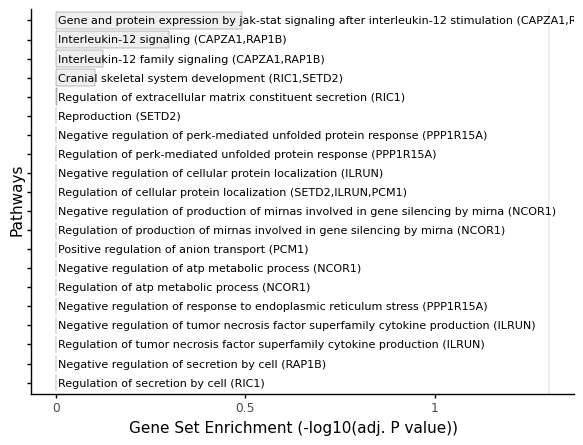

<ggplot: (8786818764221)>

In [ ]:
plot_enrichment(markers1['CR'],
    num_pathways=20,
    title='',
    ordered=True,
    cutoff=0.05,
    sources=('GO:BP', 'HPA', 'REAC'),
    organism='hsapiens',
    return_df=False)

# gen set analysis

In [ ]:
pip install gseapy

In [ ]:
import gseapy

In [ ]:
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(database='Human')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'Cancer_Cell_Line_Encyclopedia', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease_Perturbations_from_GEO_up', 'Disease_Signatures_from_GEO_down_2014', 'Disease_Signatures_from_GEO_up_2014', 'DrugMatrix', 'Drug_Perturbati

In [ ]:
adataA= adata[adata.obs['treatmentcondition'].isin(['CT','CR']),:].copy()
adataA

AnnData object with n_obs × n_vars = 634 × 16920
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'sample', 'batch', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Th2', 'Th17', 'NK', 'Th1', 'Skin_barrier', 'SS', 'Migrated'
    var: 'mito', 'ambient_expression-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'ambient_expression-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1

In [ ]:
adataA.obs['treatmentcondition']

barcode
CCCTAACCAGAATTCC-0    CT
GGGAGATTCTACTATC-0    CT
ACCCTTGCATCATTTC-0    CT
CCTCATGGTTCTCCTG-0    CT
TCTATACTCCTTCACG-0    CR
                      ..
GAAGCGAGTAGATCCT-4    CR
AGTGATCGTGCAGATG-4    CR
GTTCGCTTCCAACCGG-4    CR
AAAGGATTCAGGGATG-4    CR
TGTCCCAGTACGTACT-4    CR
Name: treatmentcondition, Length: 634, dtype: category
Categories (2, object): ['CR', 'CT']

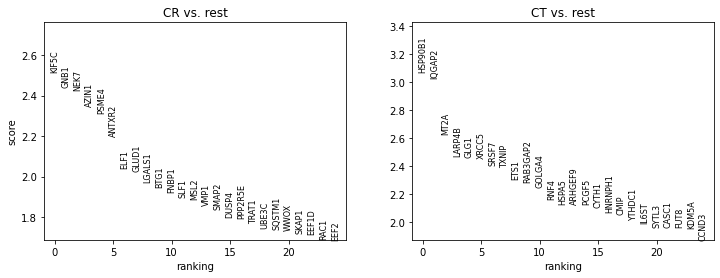

In [ ]:
sc.tl.rank_genes_groups(adataA, 'treatmentcondition', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adataA, n_genes=25, sharey=False, key="wilcoxon")

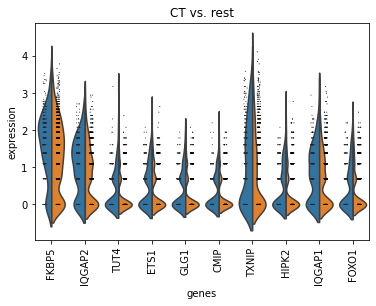

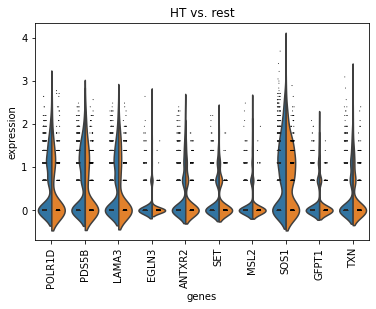

In [ ]:
sc.pl.rank_genes_groups_violin(adataA, n_genes=10, key="wilcoxon")

In [ ]:
glist = sc.get.rank_genes_groups_df(adataA, group='HR', key='wilcoxon')['names'].squeeze().str.strip().tolist()
print(len(glist))

In [ ]:
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='KEGG_2019_Human',
                     description='pathway',
                     cutoff = 0.5)

In [ ]:
enr_res.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,"RNA splicing, via transesterification reaction...",223/236,0.000004,0.015295,0,0,3.063735,38.464351,EIF4A3;HNRNPU;GPATCH1;HNRNPR;CCAR1;PNN;SNRPD2;...
1,GO_Biological_Process_2018,"mRNA splicing, via spliceosome (GO:0000398)",245/261,0.000006,0.015295,0,0,2.735714,32.891759,EIF4A3;HNRNPU;GPATCH1;HNRNPR;CCAR1;PNN;SNRPD2;...
2,GO_Biological_Process_2018,mRNA processing (GO:0006397),262/283,0.000068,0.098734,0,0,2.227518,21.379510,CCNH;EIF4A3;HNRNPU;GPATCH1;HNRNPR;CCAR1;PNN;AL...
3,GO_Biological_Process_2018,protein modification by small protein removal ...,242/261,0.000096,0.098734,0,0,2.272861,21.033664,TRRAP;CCP110;KEAP1;ACTB;PSMD8;PSMD9;PSMD6;PSMD...
4,GO_Biological_Process_2018,ubiquitin-dependent protein catabolic process ...,313/341,0.000097,0.098734,0,0,1.997251,18.458403,CBLC;UBE2L3;PSMD8;PSMD9;RNF115;PSMD6;NUB1;PSMD...


In [ ]:
# filter for genes that are expressed in more than 5 cells
tmp = adataA.raw.to_adata() 
sc.pp.calculate_qc_metrics(tmp, percent_top=None, log1p=False, inplace=True)
tmp = tmp[:,tmp.var['n_cells_by_counts']>5]

In [ ]:
sc.tl.rank_genes_groups(tmp, 'treatmentcondition', method='wilcoxon', key_added = "wilcoxon")


sc.get.rank_genes_groups_df(tmp, group='HR', key='wilcoxon')

,names,scores,logfoldchanges,pvals,pvals_adj
0,UTY,4.459879,1.329460,0.000008,0.044870
1,SLFN5,3.956289,0.978642,0.000076,0.211665
2,PARP8,3.673253,0.447622,0.000239,0.374379
3,TNRC6B,3.487360,0.406432,0.000488,0.593128
4,BPTF,3.329444,0.659180,0.000870,0.793545
...,...,...,...,...,...
10938,VIM,-3.505390,-0.769964,0.000456,0.593128
10939,GLUD1,-3.704339,-0.758577,0.000212,0.374379
10940,WAC,-3.881994,-0.571975,0.000104,0.226746
10941,LAMA3,-3.952404,-1.111718,0.000077,0.211665


In [ ]:
glist = sc.get.rank_genes_groups_df(tmp, group='CR', key='wilcoxon')['names'].squeeze().str.strip().tolist()
print(len(glist))

10943


In [ ]:
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='KEGG_2019_Human',
                     description='pathway',
                     cutoff = 0.5)

In [ ]:
enr_res.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Protein processing in endoplasmic reticulum,141/165,2.907905e-17,8.956347e-15,0,0,4.912875,187.065150,ERO1A;ERO1B;TUSC3;UBE2D2;UBE2D3;UBE2D1;CAPN2;C...
1,KEGG_2019_Human,Endocytosis,192/244,3.420379e-15,5.267384e-13,0,0,3.092664,103.013623,WASHC4;VPS29;WASHC5;TFRC;ZFYVE9;WIPF1;WIPF2;WI...
2,KEGG_2019_Human,Spliceosome,115/134,1.292471e-14,1.326937e-12,0,0,5.052058,161.562974,TCERG1;EIF4A3;HNRNPU;EFTUD2;SNRPD2;SNRPD1;MAGO...
3,KEGG_2019_Human,RNA transport,132/165,7.918182e-12,6.097000e-10,0,0,3.338822,85.346488,CYFIP2;EIF4A2;CYFIP1;POP5;POP7;NUP107;NUP188;P...
4,KEGG_2019_Human,Huntington disease,150/193,2.051674e-11,1.263831e-09,0,0,2.913387,71.697813,NDUFA11;NDUFA12;NDUFA10;COX6A1;CREB3L2;EP300;A...


Some databases of interest:

GO_Biological_Process_2017b
KEGG_2019_Human
KEGG_2019_Mouse
WikiPathways_2019_Human
WikiPathways_2019_Mouse
You visualize your results using a simple barplot, for example:

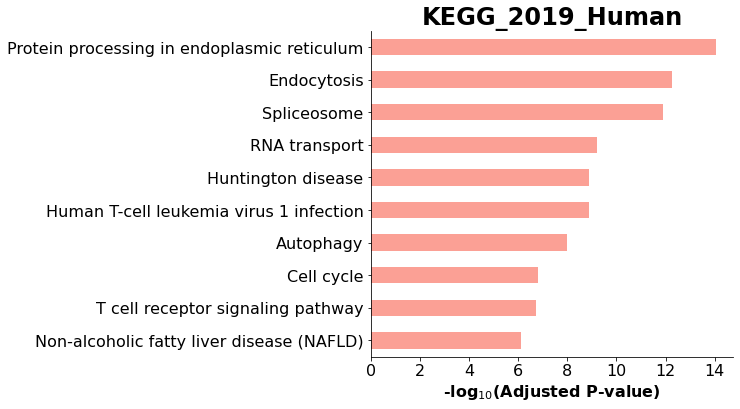

In [ ]:
gseapy.barplot(enr_res.res2d,title='KEGG_2019_Human')

# Gene Set Enrichment Analysis (GSEA)

In [ ]:
gene_rank = sc.tl.rank_genes_groups(adataA, 'treatmentcondition', method='wilcoxon', key_added = "wilcoxon",n_genes=adataA.shape[0])
gene_rank1 = sc.get.rank_genes_groups_df(adataA, group='CR', key='wilcoxon')[['names','logfoldchanges']]
gene_rank2 = sc.get.rank_genes_groups_df(adataA, group='HR', key='wilcoxon')[['names','logfoldchanges']]

In [ ]:
gene_rank2['logfoldchanges'] = -gene_rank2['logfoldchanges']
gene_rank2
gene_rank = gene_rank1.append( gene_rank2 )

In [ ]:
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(database='Human')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'Cancer_Cell_Line_Encyclopedia', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease_Perturbations_from_GEO_up', 'Disease_Signatures_from_GEO_down_2014', 'Disease_Signatures_from_GEO_up_2014', 'DrugMatrix', 'Drug_Perturbati

In [ ]:
res = gseapy.prerank(rnk=gene_rank, gene_sets='WikiPathways_2019_Human')

In [ ]:
terms = res.res2d.index
terms[:20]

Index(['Endoderm Differentiation WP2853', 'Insulin Signaling WP481',
       'VEGFA-VEGFR2 Signaling Pathway WP3888', 'Spinal Cord Injury WP2431',
       'Apoptosis Modulation and Signaling WP1772',
       'Epithelial to mesenchymal transition in colorectal cancer WP4239',
       'Non-small cell lung cancer WP4255',
       'Interferon type I signaling pathways WP585',
       'Ebola Virus Pathway on Host WP4217', 'Apoptosis WP254',
       'G Protein Signaling Pathways WP35', 'Thermogenesis WP4321',
       'Ciliary landscape WP4352',
       'Pathways in clear cell renal cell carcinoma WP4018',
       'Nuclear Receptors Meta-Pathway WP2882',
       'Corticotropin-releasing hormone signaling pathway WP2355',
       'Ectoderm Differentiation WP2858',
       'Parkin-Ubiquitin Proteasomal System pathway WP2359',
       'Sterol Regulatory Element-Binding Proteins (SREBP) signalling WP1982',
       'Alzheimers Disease WP2059'],
      dtype='object', name='Term')

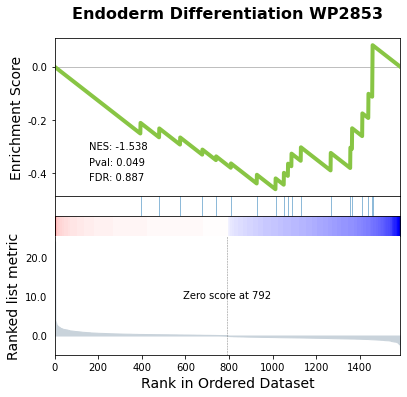

In [ ]:
gseapy.gseaplot(rank_metric=res.ranking, term=terms[0], **res.results[terms[0]])

In [ ]:
adataA= adata[adata.obs['treatmentcondition'].isin(['CT','HT']),:].copy()
adataA

AnnData object with n_obs × n_vars = 1108 × 16920
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'sample', 'batch', 'Donnor', 'Treatment', 'Condition', 'treatmentcondition', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Th2', 'Th17', 'NK', 'Th1', 'Skin_barrier', 'SS', 'Migrated'
    var: 'mito', 'ambient_expression-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'ambient_expression-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log

In [ ]:
sc.tl.rank_genes_groups(adataA, groupby='treatmentcondition', method='wilcoxon',groups= ['CR'], reference='CT', rankby_abs=False)

IndexError: ignored

In [ ]:

markers=pd.DataFrame(adataA.uns['rank_genes_groups']['names']).head(50)
markers
markers1=markers.squeeze().str.strip().tolist()

KeyError: ignored

In [ ]:
enr_res = gseapy.enrichr(gene_list=markers1,
                     organism='Human',
                     gene_sets='KEGG_2019_Human',
                     description='pathway',
                     cutoff = 0.5)

In [ ]:
enr_res.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Fluid shear stress and atherosclerosis,5/139,0.000025,0.002024,0,0,16.431177,174.209257,HSP90AB1;RAC1;SQSTM1;NFKB1;ACTG1
1,KEGG_2019_Human,PI3K-Akt signaling pathway,7/354,0.000027,0.002024,0,0,9.196502,96.872353,CDK6;HSP90AB1;PPP2R5E;GNB1;RAC1;SOS1;NFKB1
2,KEGG_2019_Human,Human cytomegalovirus infection,5/225,0.000242,0.012253,0,0,9.964646,82.978373,CDK6;GNB1;RAC1;SOS1;NFKB1
3,KEGG_2019_Human,Pathways in cancer,7/530,0.000328,0.012473,0,0,6.046912,48.507086,CDK6;HSP90AB1;GNB1;CTNNA1;RAC1;SOS1;NFKB1
4,KEGG_2019_Human,Shigellosis,3/65,0.000576,0.013816,0,0,20.474949,152.738497,RAC1;NFKB1;ACTG1


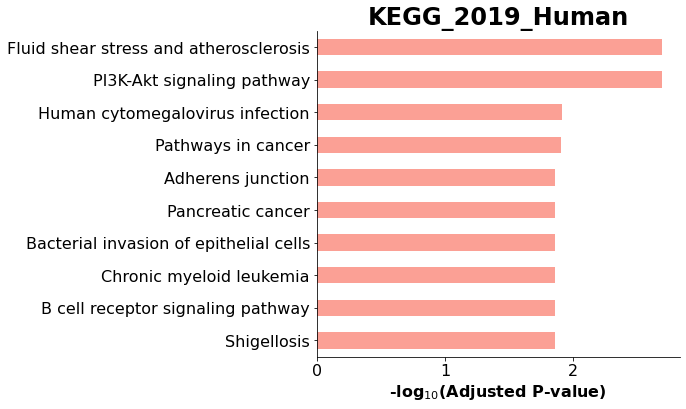

In [ ]:
gseapy.barplot(enr_res.res2d,title='KEGG_2019_Human')

# Dorothea

In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc
from anndata import AnnData
import dorothea
import matplotlib.pyplot as pl

In [ ]:
# Read Dorothea Regulons for Human
dorothea_hs = dorothea.load_regulons(['A', 'B'])

# Compute SCIRA scores
dorothea.run(adata, dorothea_hs, center=True, scale=True)

2581 targets found
4 TFs with < 5 targets


In [ ]:
tf_adata = dorothea.extract(adata)

In [ ]:
sc.tl.rank_genes_groups(tf_adata, groupby='treatmentcondition', method='wilcoxon')

In [ ]:
cell_types = np.unique(tf_adata.obs['treatmentcondition'])
top_tfs = []
for cell_type in cell_types:
    top_tf = sc.get.rank_genes_groups_df(tf_adata, cell_type).loc[0]['names']
    top_tfs.append(top_tf)

In [ ]:
top_tf

'KLF4'

In [ ]:
top_tfs

['RELB', 'STAT5B', 'SOX2', 'KLF4']

In [ ]:
top_tfs=['NFATC2']

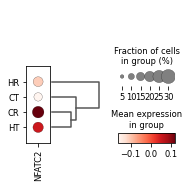

In [ ]:
sc.pl.dotplot(tf_adata,top_tfs, 'treatmentcondition', dendrogram=True)

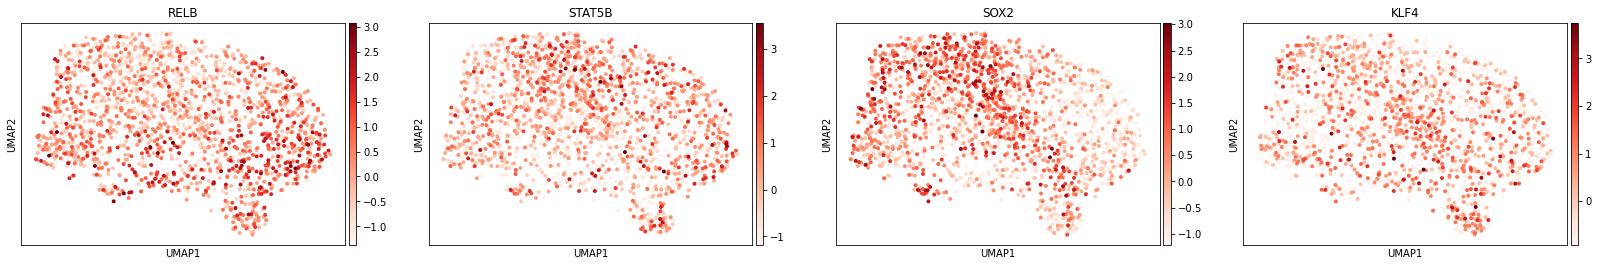

In [ ]:
sc.pl.umap(tf_adata, color=top_tfs, vmin='p10', vmax='p99.9', cmap='Reds')

/opt/conda/lib/python3.7/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _ = ax.pcolor(_color_df, **kwds)


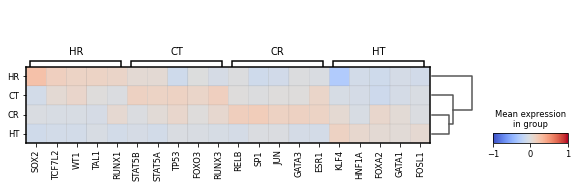

In [ ]:
sc.pl.rank_genes_groups_matrixplot(tf_adata, n_genes=5, vmin=-1, vmax=1, cmap='coolwarm')

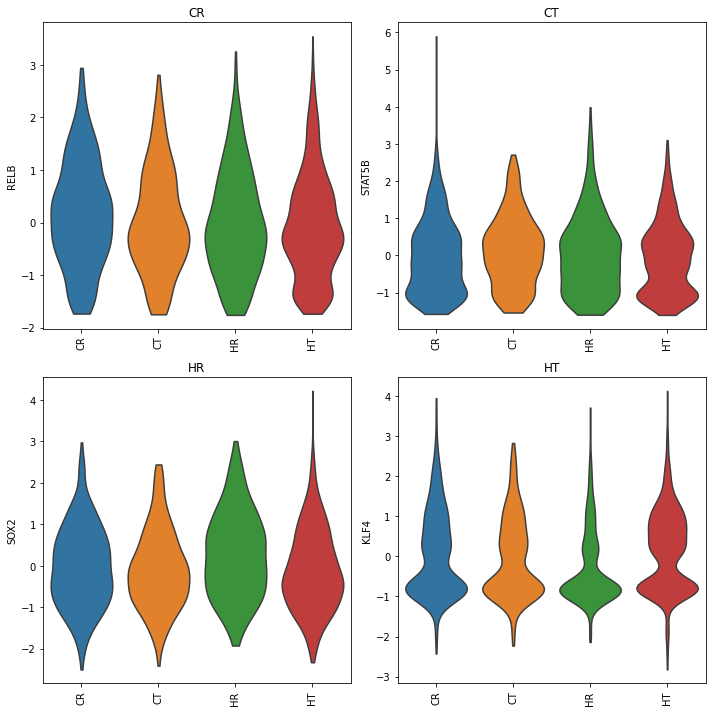

In [ ]:
fig, axes = pl.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
for cell_type, tf,ax in zip(cell_types, top_tfs, axes):
    sc.pl.violin(tf_adata, keys=tf, groupby='treatmentcondition',stripplot=False, ax=ax, show=False)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.set_title(cell_type)
fig.tight_layout()
pl.show()